### Метод Ньютона

Задание

1. ответить на все вопросы в скрипте
2. изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! 
1. Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.
2. Для каждого нелинейного, где есть указанные проблемы, надо привести демонстрацию решения вашим методом. Без этой демонстрации считается, что обработчик соответствующей проблемы не реализован и не оценивается.

In [19]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1

        dx = -func(x)/dfunc(x)

        dxs.append(abs(dx))
        x = x + dx
        #print(x)

        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
        
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

In [20]:
# модифицированная реализация Метода Ньютона

def improved_newton(func, dfunc, x, m=1, tol = 1e-12): # m - порядок кратности корня
    sol = 0
    iteration = 0
    dxs = []
    x_prev = x - 1e-0 # Начальное приближение для метода секущих (используем x - 1, при x + 1 сходился бы к другому корню)

    for i in range(30):
        iteration += 1
        f = func(x)
        df = dfunc(x)

        # Проверка производной на близость к 0, использование метода секущих в этом случае
        if abs(df) > tol: # Если производная не слишком мала, то используем её прямое значение
            dx = -m * f/df
        else: # Если производная слишком мала, то используется метод секущих
            dx = -(m* f * (x - x_prev)) / (f - func(x_prev))
            print(f"Используем метод секущих на {iteration} итерации")

        # Проверка на биения по приращению аргумента dxs, использование метода дихотомии в этом случае
        if iteration > 3 and abs(dxs[-2] - dxs[-1]) < tol and abs(dxs[-3] - dxs[-2]) < tol:
            print(f"Обнаружены биения на {iteration} итерации. Используем метод дихотомии")

            x_mid = (x + x_prev)/2
            f_mid = func(x_mid)

            if f * f_mid < 0:  # Корень между x и x_mid
                x = x_mid
            elif f_mid * func(x_prev) < 0:  # Корень между x_mid и x_prev
                x = x_mid
            else:
                # Если оба значения f(x) и f(x_prev) имеют одинаковый знак,
                # расширяем интервал в обе стороны
                print("Расширяем интервал поиска в обе стороны")
                
                # Двигаемся вправо и влево от текущего x
                x_left = x - 2 * abs(x - x_prev)  # Влево на расстояние, вдвое больше предыдущего шага
                x_right = x + 2 * abs(x - x_prev)  # Вправо на такое же расстояние

                # Выбираем тот x, где значение функции меньше по модулю
                if abs(func(x_left)) < abs(func(x_right)):
                    x = x_left
                else:
                    x = x_right

        dxs.append(abs(dx))
        x_prev = x
        x = x + dx
        #print(x)

        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
        
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration, dxs]

# Нелинейное уравнение 1

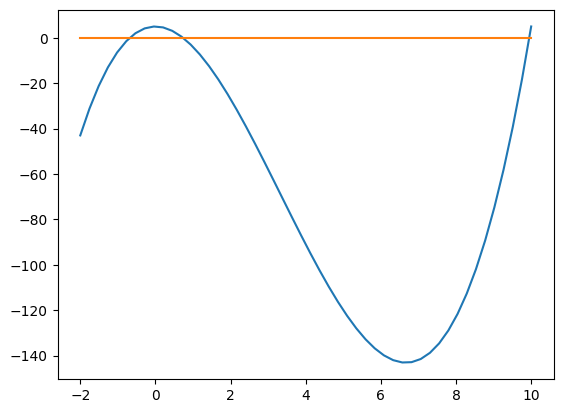

In [21]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
y_0 = np.zeros_like(x)

plt.plot(x, y)
plt.plot(x, y_0)

plt.show()

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат

## Ответ
1. Из начальных приближений и графика функции видно, что метод будет сходиться к разным значениям, начальное приближение ближе к соответствующему решению.
2. В третьем случае мы имеем дело с нулевой производной, а т.к. в методе Ньютона присутствует деление на производную, то возникает ошибка деления на ноль. Решить это ошибку можно используя метод секущих, берём вместо значения производной её приближение $f'(x_k) = \frac{f(x_k) - f(x_{k-1})}{(x_k - x_{k-1})}$
3. Для получения порядка сходимости p используем следующие соображения. $|x_{n+1} - x_*| = C|x_n - x_*|^p$, тогда $log|x_{n+1} - x_*| = 
logC + p * log|x_n - x_*|$. Тогда если взять две соседние итерации, то получим $p = \frac{log|x_{n+1} - x_*| - log|x_n - x_*|}{log|x_n - x_*| - log|x_{n-1} - x_*|}$. Используем приближение $|x_n - x_*| = |x_n - x_{n-1}| = dxs_n$. Тогда $p = \frac{log(dxs_n / dxs_{n-1})}{log(dxs_{n-1} / dxs_{n-2})}$.

Из теории известно, что метод Ньютона обладает квадратичной сходимостью. 
Отсутствие квадратичной сходимости при более поздних итерациях может объясняться тем, что существенное влияние начинает играть ошибка округления (разница dx близка к машинному нулю).
Отстутствие квадратичной сходимости в начале для 1 случая связано с плохим начальным приближением (f(x0)*f(x0)'' < 0).
Отстутствие квадратичной сходимости в начале для 3 случая связано с тем, что для начальной итерации используется метод секущих, который в начальном приближение дал большой порядок сходимости в начале.

In [22]:
# Оценка порядка сходимости

def order(dxs):

    orders = []

    for i in range(2, len(dxs)):
        if dxs[i-1] > 0 and dxs[i-2] > 0:  # Проверяем, что изменения положительны
            order = np.log(dxs[i] / dxs[i-1]) / np.log(dxs[i-1] / dxs[i-2])
            orders.append(order)

    plt.ylim(-1, 4)
    plt.plot(range(2, len(dxs)), orders, marker='o')
    plt.xlabel('Итерация')
    plt.ylabel('Порядок сходимости')
    plt.title('Зависимость порядка сходимости от итерации')
    plt.grid(True)
    plt.show()
    
    #return orders

sol =  9.949491057914388
iter =  7


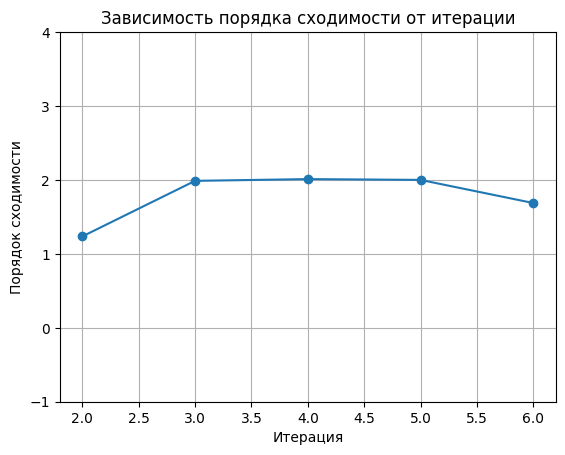

sol =  0.7346035077893033
iter =  4


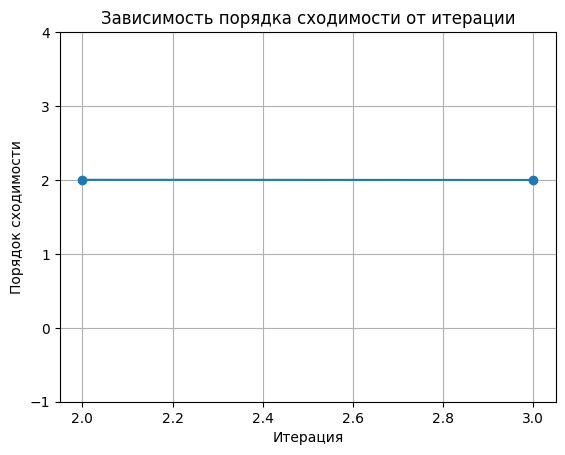

Используем метод секущих на 1 итерации
sol =  -0.6840945657036895
iter =  7


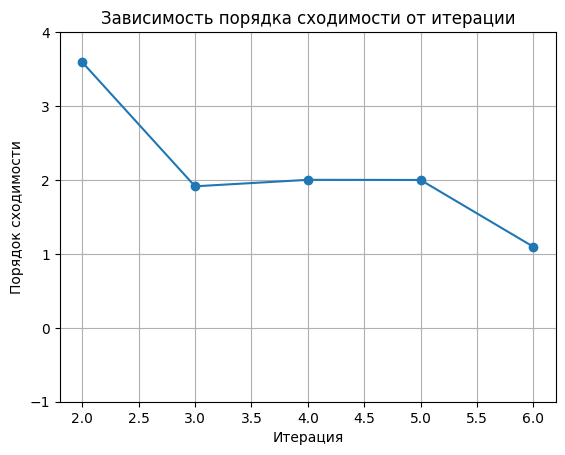

In [23]:
data = simple_newton(func0, dfunc0, 8) # случай 1
print('sol = ', data[0])
print('iter = ', data[1])
order(data[2])
data = simple_newton(func0, dfunc0, 0.7) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])
order(data[2])
data = improved_newton(func0, dfunc0, 0.0)
#data = simple_newton(func0, dfunc0, 0.0) # случай 3
print('sol = ', data[0])
print('iter = ', data[1])
order(data[2])

# Нелинейное уравнение 2

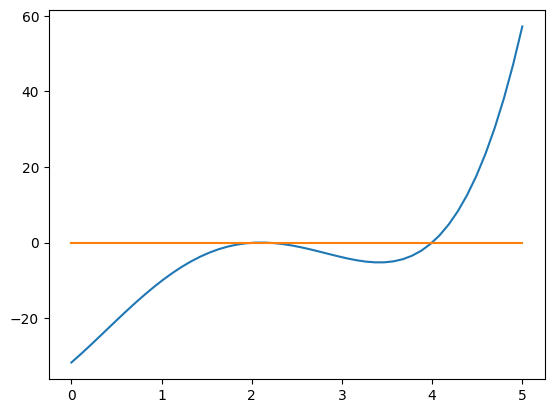

In [24]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 #double root
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
y_0 = np.zeros_like(x)

plt.plot(x, y)
plt.plot(x, y_0)

plt.show()

1. Построить график порядка сходимости от номера итерации. Объяснить результат

sol =  2.0999999786199406
iter =  23


C:\Users\maslo\AppData\Local\Temp\ipykernel_8844\1346148582.py:9: RuntimeWarning: divide by zero encountered in log
  order = np.log(dxs[i] / dxs[i-1]) / np.log(dxs[i-1] / dxs[i-2])


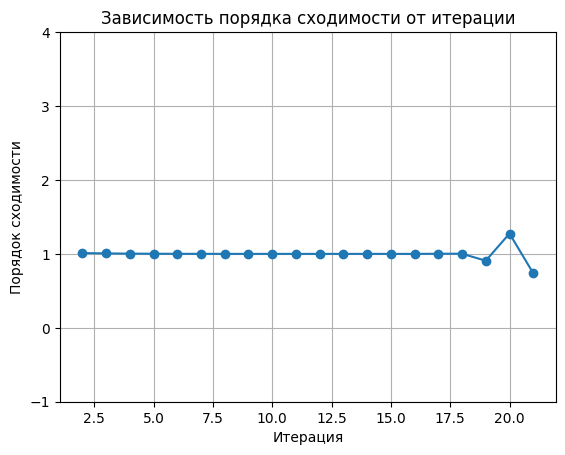

sol =  2.100000000014807
iter =  6


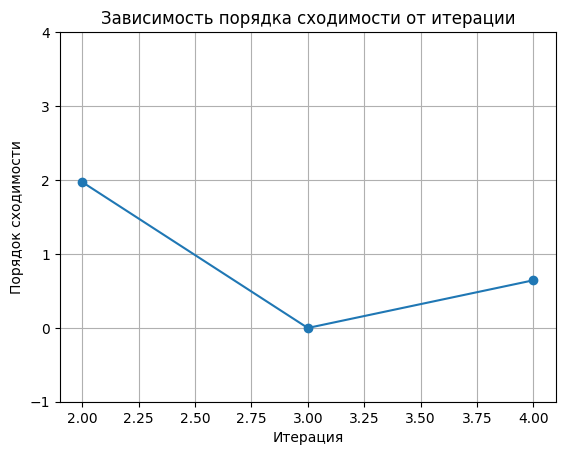

In [25]:
data = simple_newton(func1, dfunc1, 2)
print('sol = ', data[0])
print('iter = ', data[1])
order(data[2])

data = improved_newton(func1, dfunc1, 2, 2)
print('sol = ', data[0])
print('iter = ', data[1])
order(data[2])

## Ответ
1. В случае кратных корней сходимость для обычного метода Ньютона становится линейной. $f(x) = (x - x*)^m * g(x)$, тогда $f'(x) \approx m*(x - x_*)^{m-1} * g(x_*)$. Тогда для n-ой итерации метода Ньютона $x_{n+1} = x_n - \frac{(x_n - x_*)^m * g(x)}{m * (x_n - x_*)^{m-1} * g(x_*)}  =  \frac{x_n - (x_ n - x_*)}{m}$. Получаем линейный порядок сходимости в случае кратных корней $e_{n+1} = e_n * (1 - 1/m)$.

Для случая корня кратности m воспользуемся модификацией, которая восстанавливает квадратичную сходимость метода. $x_{n+1} = x_{n} - m * \frac{f(x_n) }{f'(x_n)}$. В этом случае, если брать только линейный член g(x), чтобы оценить порядок сходимости, то мы получим ноль для первого члена, а именно $x_{n+1} = x_n - m * \frac{(x_n - x_*)^m * g(x)}{m * (x_n - x_*)^{m-1} * g(x_*)}  =  x_n - (x_ n - x_*) = x_*, т.е. e_{n+1} = 0$ и необходимо брать второй член разложения g(x), тогда получим $x_{n+1} = x_n - \frac{e_n * g(x_n)}{g(x_*)} = x_n - e_n * \frac{g(x_*) + g'(x_*) * e_n + O(e_n^2)}{g(x_*)} = x_n - e_n * (1 + C*e_n + O(e_n^2))$.

Тогда получаем, что $e_{n+1} \approx C*(e_n)^2$, т.е. квадратичную сходимость

# Нелинейное уравнение 3

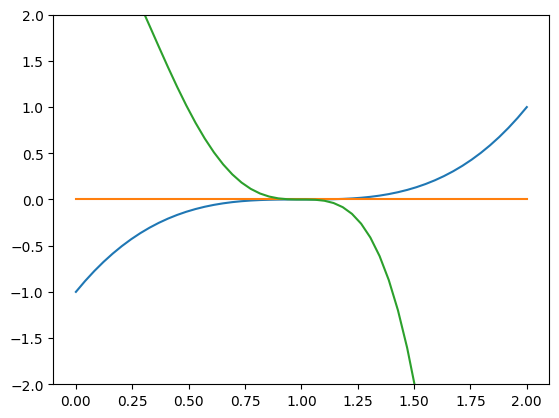

In [26]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: (3*(x-1)**2) 

func_2 = lambda x: ((x-1)**3) * (x**2 - 10*x - 3)
dfunc_2 = lambda x: ((3*(x-1)**2) * (x**2 - 10*x - 3)) + ((x-1)**3) * (2*x - 10)
y = func2(x)
y_0 = np.zeros_like(x)
y_f2 = func_2(x)

plt.ylim(-2, 2)

plt.plot(x, y)
plt.plot(x, y_0)
plt.plot(x, y_f2)

plt.show()

1. Подобрать начальное приближение и решить задачу

## Ответ
Воспользуемся модернизированным методом Ньютона, учтём кратность корня - 3. Начальное приближение возьмём около 1.1. Однако заметим, что для функции $f(x) = (x-1)^3$ при любом начальном приближение ответ находится за 2 итерации, это связано с видом функции, применяя метод Ньютона к ней мы получаем ответ на первой же итерации (не считаю 0 итерацию) $x_1 = x_0 - 3*\frac{(x_0 - x_*)^3}{3 * (x_0 - x_*)^2} = x_*$. Для более сложной функции получим, что количество итераций становится существенным.

sol =  1.0000000000017601
iter =  27


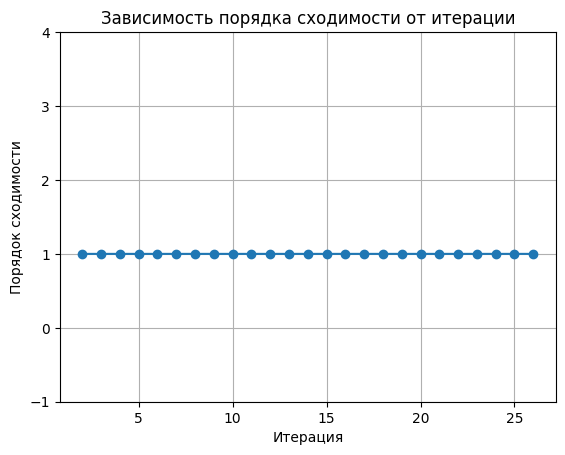

Используем метод секущих на 2 итерации
sol =  1.0
iter =  2


"\ndata = improved_newton(func_2, dfunc_2, 0.1, 3)\nprint('sol = ', data[0])\nprint('iter = ', data[1])\n"

In [27]:
data = simple_newton(func2, dfunc2, 1.0000001)
print('sol = ', data[0])
print('iter = ', data[1])
order(data[2])

data = improved_newton(func2, dfunc2, 1000, 3)
print('sol = ', data[0])
print('iter = ', data[1])
"""
data = improved_newton(func_2, dfunc_2, 0.1, 3)
print('sol = ', data[0])
print('iter = ', data[1])
"""

# Нелинейное уравнение 4

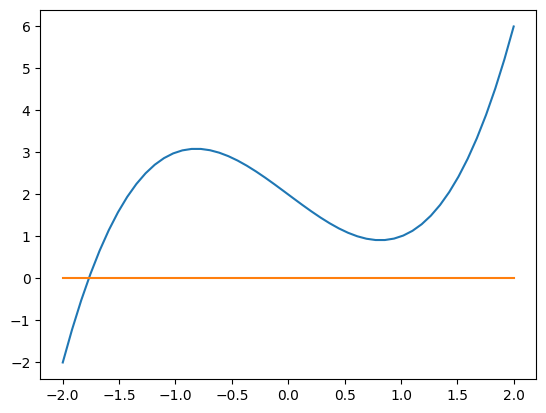

In [28]:
x = np.linspace(-2,2)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
y_0 = np.zeros_like(x)

plt.plot(x, y)
plt.plot(x, y_0)

plt.show()

1. Почему не находится решение во втором случае?

## Ответ
При анализе приращений аргумента можно заметить, что во втором случае мы попадаем в ситуацию с биениями. Для избежания этого напишем участок кода, который будет анализировать эти приращения и в случае возникновения биений переходить к использованию сильно более медленного метода дихотомии. Заметим, что на поздних итерациях порядок сходимости равен 2, что соответствует теоретическому значению для метода Ньютона. Плохой порядок сходимости на начальных итерациях объясняется использованием метода дихотомии и плохим начальным приближением для метода Ньютона, когда мы переходим к нему от метода дихотомии.

sol =  -1.7692923542386314
iter =  10
Обнаружены биения на 4 итерации. Используем метод дихотомии
Расширяем интервал поиска в обе стороны
Обнаружены биения на 5 итерации. Используем метод дихотомии
sol =  -1.7692923542386314
iter =  12
[1.0, 1.0, 1.0, 1.0, 0.2, 0.7827361563517915, 0.2605015199614936, 0.05103636879844228, 0.0019033099770262517, 2.6033713309342438e-06, 4.867253676225731e-12, 0.0]


C:\Users\maslo\AppData\Local\Temp\ipykernel_8844\1346148582.py:9: RuntimeWarning: invalid value encountered in scalar divide
  order = np.log(dxs[i] / dxs[i-1]) / np.log(dxs[i-1] / dxs[i-2])
C:\Users\maslo\AppData\Local\Temp\ipykernel_8844\1346148582.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  order = np.log(dxs[i] / dxs[i-1]) / np.log(dxs[i-1] / dxs[i-2])
C:\Users\maslo\AppData\Local\Temp\ipykernel_8844\1346148582.py:9: RuntimeWarning: divide by zero encountered in log
  order = np.log(dxs[i] / dxs[i-1]) / np.log(dxs[i-1] / dxs[i-2])


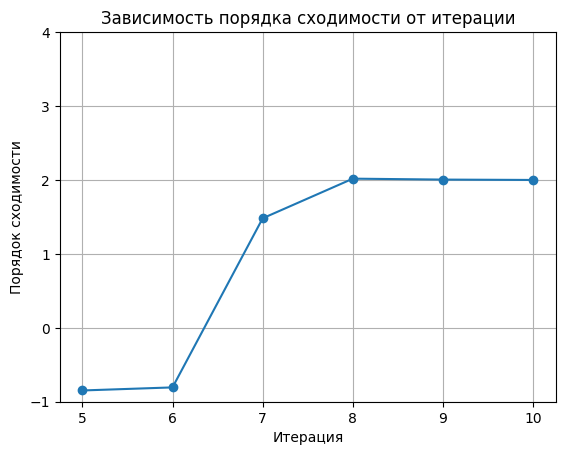

In [29]:
data = simple_newton(func3, dfunc3, 0.5) # случай 1
print('sol = ', data[0])
print('iter = ', data[1])

data = improved_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])
print(data[2])
order(data[2])